In [13]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def load_data(battery):
  mat = loadmat(f"C:\\Users\\neeraj\\Downloads\\naza (1)\\{battery}.mat")
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []

  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]
dataset, capacity = load_data('B0005')
# dataset.to_csv("B0005.csv")
pd.set_option('display.max_columns', 10)
# print(dataset.head())
# dataset.describe()


Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In [15]:
dataset.tail()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.0,2781.312
50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.0,2791.062
50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.0,2800.828
50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.0,2810.640
50284,168,24,2008-05-27 20:45:42,1.325079,3.589937,-0.000583,34.405920,0.0006,0.0,2820.390


Text(0.5, 1.0, 'Discharge B0005')

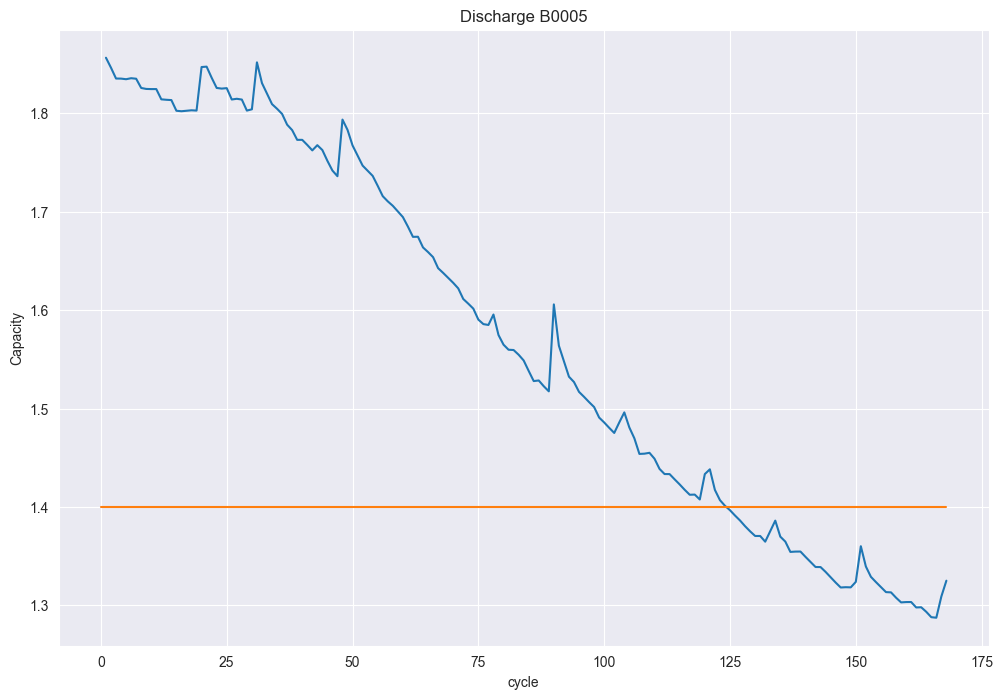

In [16]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [17]:
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


Text(0.5, 1.0, 'Discharge B0005')

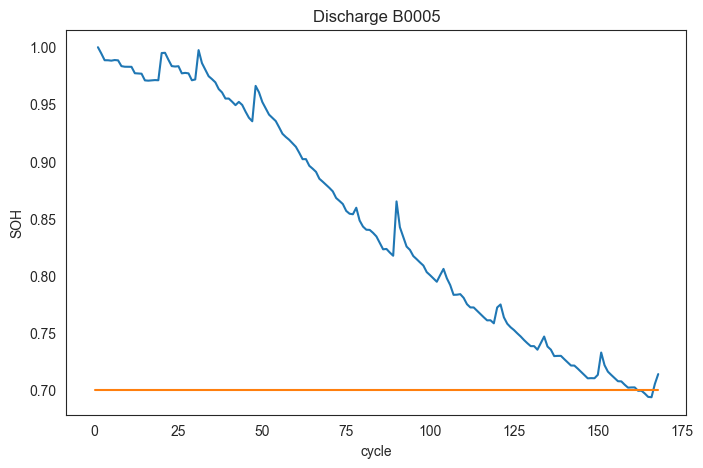

In [18]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [19]:
C = dataset['capacity'][0]
soh = []
for i in range(len(dataset)):
  soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset = sc.fit_transform(train_dataset)
print(train_dataset.shape)
print(soh.shape)

(50285, 7)
(50285, 1)


In [20]:
X = train_dataset
X

array([[1.00000000e+00, 9.82216203e-01, 9.93912495e-01, ...,
        4.99849880e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.81795921e-01, 9.95593528e-01, ...,
        4.99849880e-01, 9.92449269e-01, 4.54740810e-03],
       [1.00000000e+00, 8.59640432e-01, 8.13621166e-03, ...,
        5.00400320e-05, 7.22510618e-01, 9.67499622e-03],
       ...,
       [6.61238996e-02, 6.38738471e-01, 9.94807358e-01, ...,
        5.00150120e-01, 0.00000000e+00, 7.58983848e-01],
       [6.61238996e-02, 6.40352345e-01, 9.96917596e-01, ...,
        5.00150120e-01, 0.00000000e+00, 7.61642758e-01],
       [6.61238996e-02, 6.41824310e-01, 9.96032820e-01, ...,
        5.00150120e-01, 0.00000000e+00, 7.64284866e-01]])

In [21]:
y=soh
y

,SoH
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
50280,0.713756
50281,0.713756
50282,0.713756
50283,0.713756


In [22]:
y=y.to_numpy()


In [24]:
y

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.71375616],
       [0.71375616],
       [0.71375616]])

In [25]:
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.metrics import mean_absolute_error



# Splitting the dataset into input features (X_train) and target labels (y_train)
X_train, X_test, y_train, y_test = train_test_split(train_dataset, soh.to_numpy(), test_size=0.2, random_state=42)

# Base learners
Model = SVR(kernel='rbf')

Model.fit(X_train, y_train.ravel())

SVR()

In [26]:
y_pred = Model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)

mae

0.053035248714562125

In [27]:
y_pred

array([0.80143773, 0.892875  , 0.84208703, ..., 0.82955179, 0.79336974,
       0.79553255])

In [28]:
import pandas as pd

# Convert y_test and soh_pred to 1-dimensional arrays
y_test_1d = y_test.ravel()
soh_pred_1d = y_pred.flatten()

# Create a DataFrame to store the actual and predicted SoH values
soh_comparison = pd.DataFrame({'Actual SoH': y_test_1d, 'Predicted SoH': soh_pred_1d})

# Print the DataFrame
print(soh_comparison)


       Actual SoH  Predicted SoH
0        0.735142       0.801438
1        0.974587       0.892875
2        0.837436       0.842087
3        0.729508       0.798419
4        0.713106       0.793971
...           ...            ...
10052    0.704446       0.795204
10053    0.955050       0.887716
10054    0.808810       0.829552
10055    0.693785       0.793370
10056    0.704446       0.795533

[10057 rows x 2 columns]


In [30]:
new_data = np.array([[1.0, 0.9822162, 0.9939125, 0.06115743, 0.49984988, 0.0, 0.0]])
soh_prediction = Model.predict(new_data)
print("Predicted SoH:", soh_prediction) 

Predicted SoH: [0.90005895]
